# IMDB Genere Classification

### link to app:
##### https://cena980-movie-genre-classifier.hf.space/?__theme=system&deep_link=D0hyO-59acY

In [2]:
import pandas as pd

file_name = 'train_data.txt'
records = []
with open(file_name, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split(" ::: ")
        if len(parts) == 4:
            record_id, title, genre, description = parts
            records.append({
                "ID": record_id,
                "Title": title,
                "Genre": genre,
                "Description": description
            })

df = pd.DataFrame(records)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train_data.txt'

In [2]:
df['text'] = df['Title'] + ": " + df['Description']

In [3]:
genre_db = df[["text", "Genre"]]

In [4]:
genre_db.head()

,text,Genre
0,Oscar et la dame rose (2009): Listening in to ...,drama
1,Cupid (1997): A brother and sister with a past...,thriller
2,"Young, Wild and Wonderful (1980): As the bus e...",adult
3,The Secret Sin (1915): To help their unemploye...,drama
4,The Unrecovered (2007): The film's title refer...,drama


In [5]:
genre_db.shape

(54214, 2)

In [6]:
import pandas as pd

file_name = 'test_data_solution.txt'
records = []
with open(file_name, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split(" ::: ")
        if len(parts) == 4:
            record_id, title, genre, description = parts
            records.append({
                "ID": record_id,
                "Title": title,
                "Genre": genre,
                "Description": description
            })

test = pd.DataFrame(records)
test.head()

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


In [7]:
test['text'] = test['Title'] + ": " + test['Description']

In [8]:
genre_db_test = test[["text", "Genre"]]

In [9]:
genre_db_test.shape

(54200, 2)

In [10]:
# Concatenate both DataFrames
full_dataset = pd.concat([genre_db, genre_db_test], ignore_index=True)
full_dataset = full_dataset.rename(columns={"FullText": "text", "Genre": "label"})

In [11]:
full_dataset

,text,label
0,Oscar et la dame rose (2009): Listening in to ...,drama
1,Cupid (1997): A brother and sister with a past...,thriller
2,"Young, Wild and Wonderful (1980): As the bus e...",adult
3,The Secret Sin (1915): To help their unemploye...,drama
4,The Unrecovered (2007): The film's title refer...,drama
...,...,...
108409,"""Tales of Light & Dark"" (2013): Covering multi...",horror
108410,Der letzte Mohikaner (1965): As Alice and Cora...,western
108411,Oliver Twink (2007): A movie 169 years in the ...,adult
108412,"Slipstream (1973): Popular, but mysterious roc...",drama


In [12]:
from datasets import Dataset, DatasetDict, ClassLabel

# Get unique genres (sorted for consistency)
genre_names = sorted(full_dataset['label'].unique())

# Map genre names to indices
label2id = {genre: i for i, genre in enumerate(genre_names)}
full_dataset['label'] = full_dataset['label'].map(label2id)


In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(full_dataset, test_size=0.2, random_state=42, stratify=full_dataset['label'])  # optional: stratify


In [16]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)


In [17]:
from datasets import Features, Value

# Define schema
features = Features({
    'text': Value(dtype='string'),
    'label': ClassLabel(names=genre_names)
})

# Convert to datasets
train_dataset = Dataset.from_pandas(train_df, features=features)
test_dataset = Dataset.from_pandas(test_df, features=features)

genre_dataset = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})


In [18]:
genre_dataset['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 86731
})

In [19]:
genre_dataset['test'][0]

{'text': 'Lynch (2007): Compiled from over two years of footage, the film is an intimate portrait of \'David Lynch (I)\' (qv)\'s creative process as he completes his latest film, _Inland Empire (2006)_ (qv). We follow Lynch as he discovers beauty in ideas, leading us on a journey through the abstract which ultimately unveils his cinematic vision. The director of the documentary immersed himself in David Lynch\'s world; living and working at Lynch\'s home. His unobtrusive style has captured a personal side of David Lynch not seen before. The film reveals Lynch not only as one of the most original and compelling directors of contemporary film but also as an artist who continues to explore and experiment in countless mediums. We witness his "hands on" approach to painting, sculpting, music and screenwriting. His enthusiasm is infectious; inspiring us to tap into the well of creativity that Lynch believes we all have.',
 'label': 7}

In [20]:
genre_dataset['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['action', 'adult', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'game-show', 'history', 'horror', 'music', 'musical', 'mystery', 'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show', 'thriller', 'war', 'western'], id=None)}

In [21]:
class_label=genre_dataset['train'].features['label'].names
class_label

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [22]:
emo_id2label={idx:x for idx,x in enumerate(class_label)}
emo_id2label

{0: 'action',
 1: 'adult',
 2: 'adventure',
 3: 'animation',
 4: 'biography',
 5: 'comedy',
 6: 'crime',
 7: 'documentary',
 8: 'drama',
 9: 'family',
 10: 'fantasy',
 11: 'game-show',
 12: 'history',
 13: 'horror',
 14: 'music',
 15: 'musical',
 16: 'mystery',
 17: 'news',
 18: 'reality-tv',
 19: 'romance',
 20: 'sci-fi',
 21: 'short',
 22: 'sport',
 23: 'talk-show',
 24: 'thriller',
 25: 'war',
 26: 'western'}

In [23]:
emo_label2id={x:idx for idx,x in emo_id2label.items()}
emo_label2id

{'action': 0,
 'adult': 1,
 'adventure': 2,
 'animation': 3,
 'biography': 4,
 'comedy': 5,
 'crime': 6,
 'documentary': 7,
 'drama': 8,
 'family': 9,
 'fantasy': 10,
 'game-show': 11,
 'history': 12,
 'horror': 13,
 'music': 14,
 'musical': 15,
 'mystery': 16,
 'news': 17,
 'reality-tv': 18,
 'romance': 19,
 'sci-fi': 20,
 'short': 21,
 'sport': 22,
 'talk-show': 23,
 'thriller': 24,
 'war': 25,
 'western': 26}

In [24]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification
model_id='distilbert/distilbert-base-uncased'
tokenizer=AutoTokenizer.from_pretrained(model_id)
model=AutoModelForSequenceClassification.from_pretrained(model_id,num_labels=len(class_label),label2id=emo_label2id,id2label=emo_id2label,ignore_mismatched_sizes=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Evaluating Max word count

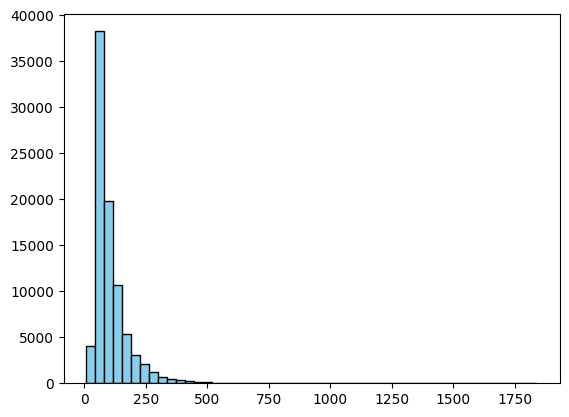

In [25]:
import matplotlib.pyplot as plt

word_count=[len(data.split(' ')) for data in genre_dataset['train']['text']]
plt.hist(word_count, bins=50, color='skyblue', edgecolor='black')
plt.show()


In [26]:
max(word_count)

1840

In [27]:
def token_function(data):
  return tokenizer(data['text'],truncation=True,max_length=512)

train_token=genre_dataset['train'].map(token_function,batched=True)
test_token=genre_dataset['test'].map(token_function,batched=True)

Map:   0%|          | 0/86731 [00:00<?, ? examples/s]

Map:   0%|          | 0/21683 [00:00<?, ? examples/s]

In [28]:
train_token

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 86731
})

In [29]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [30]:
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.2 MB/s eta 0:00:00


In [31]:
import evaluate
import numpy as np
accuracy = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [44]:
from huggingface_hub import login
login()

In [35]:
from transformers import TrainingArguments,Trainer
training_args = TrainingArguments(
    output_dir="./IMDB_genre_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=True,
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_token,
    eval_dataset=test_token,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

<ipython-input-35-649dd6f24a12>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy
1,1.064700,1.008546,0.684868
2,0.804800,0.977976,0.700318


TrainOutput(global_step=10842, training_loss=1.0176418088410881, metrics={'train_runtime': 5948.2896, 'train_samples_per_second': 29.162, 'train_steps_per_second': 1.823, 'total_flos': 1.5746236438341006e+16, 'train_loss': 1.0176418088410881, 'epoch': 2.0})

In [36]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [47]:
model.save_pretrained('./IMDB_genre_model_2')
tokenizer.save_pretrained("./IMDB_genre_model_2")

('./IMDB_genre_model_2/tokenizer_config.json',
 './IMDB_genre_model_2/special_tokens_map.json',
 './IMDB_genre_model_2/vocab.txt',
 './IMDB_genre_model_2/added_tokens.json',
 './IMDB_genre_model_2/tokenizer.json')

In [49]:
from huggingface_hub import HfApi, HfFolder, Repository

model.push_to_hub("Cena980/IMDB_genre_model_2")
tokenizer.push_to_hub("Cena980/IMDB_genre_model_2")


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Cena980/IMDB_genre_model_2/commit/4cdf919abc68752464e562bc4a2994cb8d896c03', commit_message='Upload tokenizer', commit_description='', oid='4cdf919abc68752464e562bc4a2994cb8d896c03', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Cena980/IMDB_genre_model_2', endpoint='https://huggingface.co', repo_type='model', repo_id='Cena980/IMDB_genre_model_2'), pr_revision=None, pr_num=None)

In [39]:
train_token[0]['text']

'Songs of Bertolt Brecht (1972): Gisela May, star of Bertolt Brecht\'s East German "Berliner Ensemble" theater, in a concert of his songs. The music is by several of the major composers who worked with him: Paul Dessau, Hanns Eisler, Kurt Weill. The songs are sung in the original German, each preceded by a brief English explanation or accompanied by subtitles. From "Die Dreigroschenoper" ("Threepenny Opera"): "Moritat" ("Mack the Knife"), and "Seerauber Jenny" ("Pirate Jenny"). From "Happy End" the song "Surabaya Johnny." From "Mutter Courage und ihre Kinder" ("Mother Courage"): "Lied des Solomons." From "Schweyk im zweiten Weltkrieg" ("Schweyk in the Second World War"): "Das Moldau Lied." From "Aufstieg und Fall der Stadt Mahagonny" ("The Rise and Fall of Mahagonny"): "Alabama Song" (in English.) Also included here: "The Song of the Nazi Soldier\'s Wife," "Ballade von Marie Sanders," and "Zu Potsdam unter den Eichen."'

In [50]:
from transformers import pipeline
pipe=pipeline('text-classification',model='Cena980/IMDB_genre_model_2')
output=pipe('A man finds himself bewildered in a lost island')
output

config.json:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'short', 'score': 0.4093175232410431}]

In [51]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.4 MB/s eta 0:00:00


In [1]:
import gradio as gr
from transformers import pipeline

# Initialize the pipeline
pipe = pipeline('text-classification', model='Cena980/IMDB_genre_model_2')

def classify_text(input_text):
    output = pipe(input_text)
    return output

interface = gr.Interface(
    fn=classify_text,
    inputs="text",
    outputs="json",
    title="Movie Genre Classifier",
    description="Classify Movies genres based on description using the Cena980/IMDB_genre_model_2.",
)

interface.launch()


ModuleNotFoundError: No module named 'gradio'